**Summative Lab - Analytics Firm Clients**

In this lab, you will explore the fundamental steps of data science by working through three realistic tasks: analyzing text, forecasting trends from time-based data, and building neural network models. Through these tasks, you will gain experience in collecting, preprocessing, analyzing, and modeling real-world data—culminating in actionable insights and predictions that can inform better decision-making within an organization.

**Scenario**

Imagine you have just joined a mid-sized analytics firm where new clients regularly ask for help across diverse problem areas. Three of your current projects illustrate the variety of challenges junior data scientists often encounter:

**Natural Language Processing (NLP)**: You’ve been handed a large collection of text documents (akin to the 20 Newsgroups dataset) representing community forum posts. Your task is to quickly categorize or label these posts so that the support team can route questions to the right channels more efficiently.

**Time Series Forecasting**: Another client wants to understand and predict fluctuations in a major financial index over time (similar to using S&P 500 data). They need to anticipate market conditions and plan investment strategies or budgeting decisions with greater confidence.

**Neural Network Modeling**: A separate team is experimenting with machine learning solutions for both classification and regression problems. For demonstration, they’ve given you two small datasets:
- An image-based classification task (e.g., hand-written digits recognition).
- A numeric dataset where the goal is to predict a target variable (e.g., the wine dataset for assessing wine quality or category).

These three projects — NLP for text data, time series techniques for financial or sales forecasting, and neural networks for classification/regression tasks — represent a wide range of common business needs.

**Lab Challenge**

Each of these projects reflects a common situation where diverse data types (text, temporal, numeric/images) call for specialized approaches. Your main objective is to demonstrate competence across all three areas:

- **NLP**: Classify or label textual data efficiently, unlocking the potential hidden in free-form text.
- **Time Series**: Forecast market or operational metrics reliably, enabling informed business and investment decisions.
- **Neural Networks**: Leverage deep learning approaches for both classification and regression, preparing you for more complex tasks like image recognition or advanced predictive analytics.

Through this lab, you will practice navigating each stage of a data science project, building confidence in your technical skills and understanding how to tailor those skills to real-world challenges.


**Part 1: Natural Language Processing (NLP)**

You have a large set of forum or user-post data that needs categorization to streamline support requests. Imagine receiving posts about technical issues, general inquiries, and miscellaneous topics.

In [248]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter


# For text preprocessing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


# For dataset loading
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_20newsgroups


# Set random seed for reproducibility
np.random.seed(42)


# Load a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.autos', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, random_state=42)


# Create a DataFrame for easier manipulation
df = pd.DataFrame({
   'text': newsgroups.data,
   'category': [newsgroups.target_names[target] for target in newsgroups.target]
})


# Preview the data
print(f"Dataset shape: {df.shape}")
print("\nCategory distribution:")
print(df['category'].value_counts())
print("\nSample document:")
print(df['text'][10][:500])  # Print first 500 characters of a sample document

Dataset shape: (2236, 2)

Category distribution:
category
rec.autos             594
sci.space             593
comp.graphics         584
talk.politics.misc    465
Name: count, dtype: int64

Sample document:
From: bob1@cos.com (Bob Blackshaw)
Subject: Re: Dumbest Driver Action
Organization: Corporation for Open Systems
Distribution: usa 
Lines: 41

In <C5Dq2n.5uB@news.cso.uiuc.edu> mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Blunier) writes:

>jimf@centerline.com (Jim Frost) writes:

>>I wish I had the figures with me to back me up, but I recall
>>statistics showing that women tended to have more accidents than men
>>but the damage was generally quite minor.  Men had fewer but far more
>>expensive acciden


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_pe

In [249]:
# Checks for missing values in each column of the DataFrame.
print(df.isnull().sum())

text        0
category    0
dtype: int64


In [250]:
# Displays the shape of the dataset and the count of documents in each category to understand class distribution.

print("Dataset shape:", df.shape)
print("\nCategory distribution:\n", df['category'].value_counts())

Dataset shape: (2236, 2)

Category distribution:
 category
rec.autos             594
sci.space             593
comp.graphics         584
talk.politics.misc    465
Name: count, dtype: int64


In [251]:
# Pre-load reusable tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [252]:
def preprocess_text(text, remove_stopwords=True, lemmatize=True):
    text = text.lower()                                                 # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                                # Remove special characters/numbers
    tokens = word_tokenize(text)                                        # Tokenize
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]    # Optional: Remove stopwords
    if lemmatize:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]        # Lemmatize or stem tokens
    # Return the cleaned token list
    return tokens

df['clean_tokens'] = df['text'].apply(preprocess_text)
df['doc_length'] = df['clean_tokens'].apply(len)

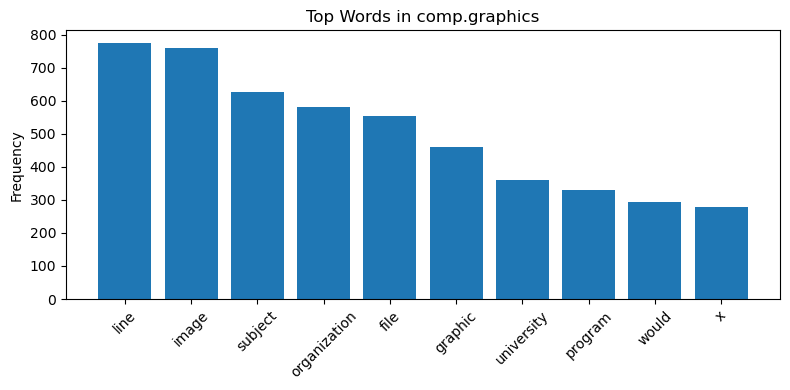

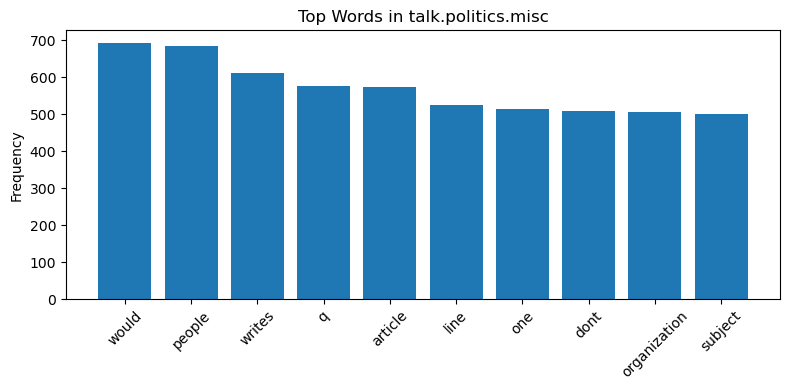

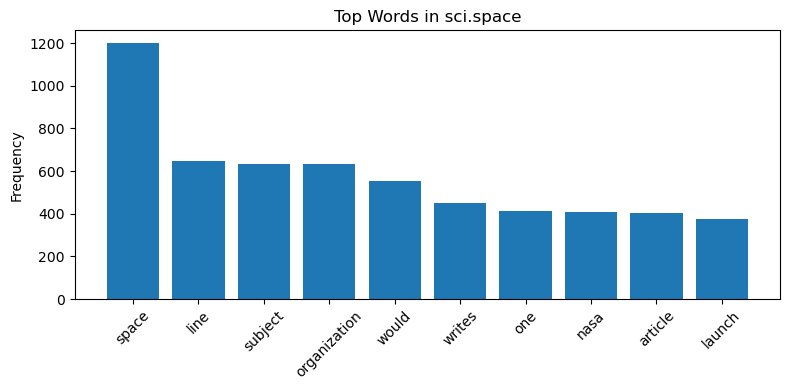

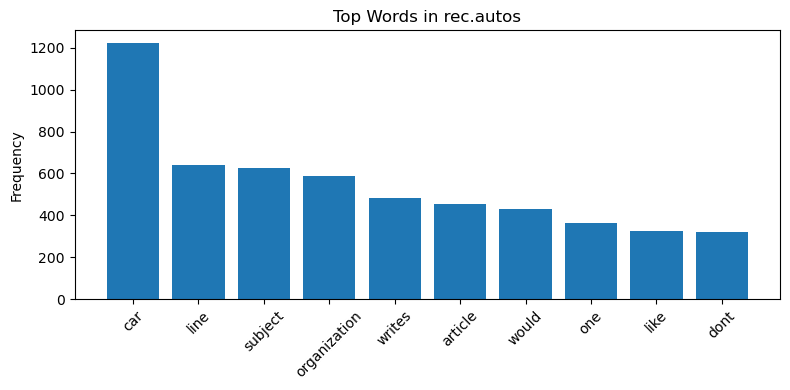

In [ ]:
# Visualize most Common Words per Category
for category in df['category'].unique():
    all_words = [word for tokens in df[df['category'] == category]['clean_tokens'] for word in tokens]
    freq_dist = nltk.FreqDist(all_words)
    common_words = freq_dist.most_common(10)
    words, freqs = zip(*common_words)
    
    plt.figure(figsize=(8, 4))
    plt.bar(words, freqs)
    plt.title(f"Top Words in {category}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [ ]:
# Use your cleaned tokens column
token_col = 'clean_tokens'

#Single Word Frequency
word_counter = Counter([token for doc in df[token_col] for token in doc])
print("Top 20 Most Frequent Words:")
print(word_counter.most_common(20))

# Bigram Frequency
# Flatten all tokens into one list and generate bigrams
bigram_counter = Counter(ngrams([token for doc in df[token_col] for token in doc], 2))
print("\nTop 20 Most Frequent Bigrams:")
print(bigram_counter.most_common(20))

Top 20 Most Frequent Words:
[('line', 2587), ('subject', 2387), ('organization', 2307), ('would', 1970), ('writes', 1792), ('article', 1664), ('one', 1563), ('space', 1289), ('dont', 1282), ('car', 1263), ('like', 1209), ('university', 1149), ('get', 1147), ('people', 1119), ('know', 1062), ('think', 1053), ('time', 1041), ('nntppostinghost', 1021), ('u', 988), ('also', 963)]

Top 20 Most Frequent Bigrams:
[(('line', 'article'), 607), (('writes', 'article'), 417), (('line', 'nntppostinghost'), 381), (('organization', 'university'), 374), (('mr', 'stephanopoulos'), 341), (('dont', 'know'), 210), (('distribution', 'world'), 207), (('line', 'distribution'), 204), (('usa', 'line'), 199), (('distribution', 'usa'), 146), (('dont', 'think'), 131), (('would', 'like'), 121), (('united', 'state'), 120), (('m', 'myers'), 117), (('world', 'nntppostinghost'), 116), (('university', 'line'), 114), (('anyone', 'know'), 111), (('state', 'university'), 110), (('im', 'sure'), 108), (('new', 'york'), 107)

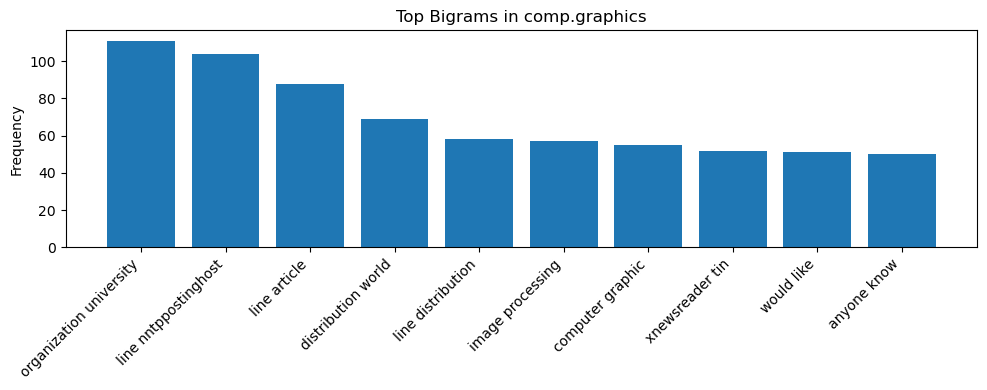

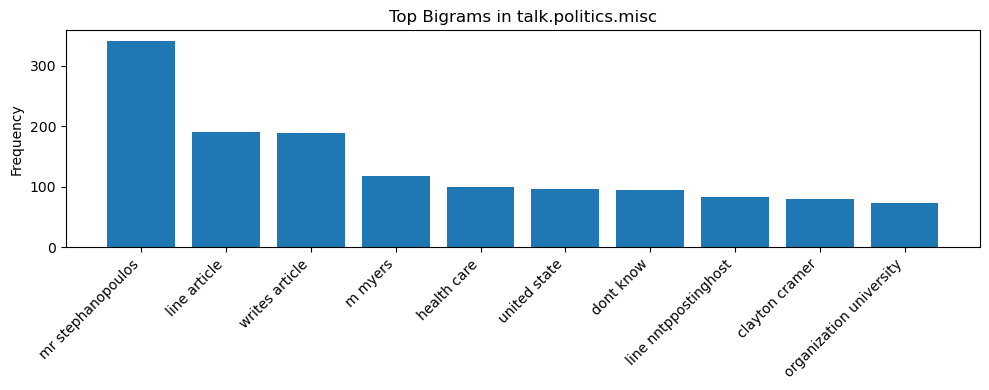

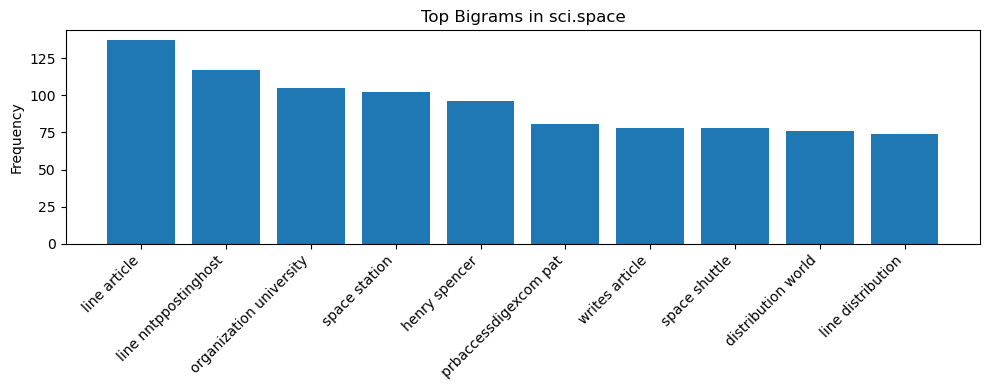

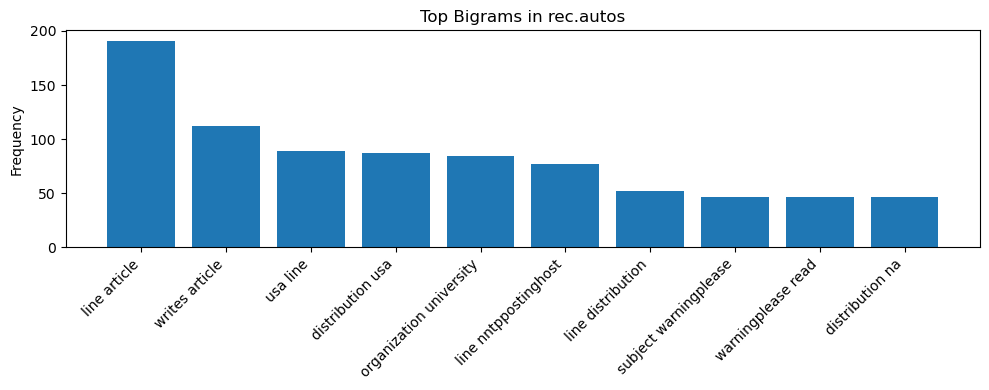

In [255]:
for category in df['category'].unique():
    # Flatten all tokens for the current category
    all_tokens = [token for tokens in df[df['category'] == category]['clean_tokens'] for token in tokens]
    
    # Generate bigrams
    bigrams = list(ngrams(all_tokens, 2))
    bigram_counts = Counter(bigrams).most_common(10)
    
    # Prepare labels and values
    labels = [' '.join(bigram) for bigram, _ in bigram_counts]
    counts = [count for _, count in bigram_counts]
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(labels, counts)
    plt.title(f"Top Bigrams in {category}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

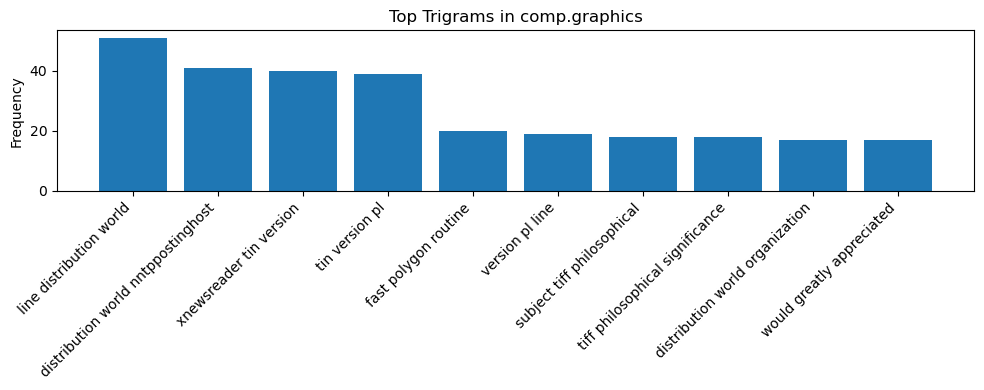

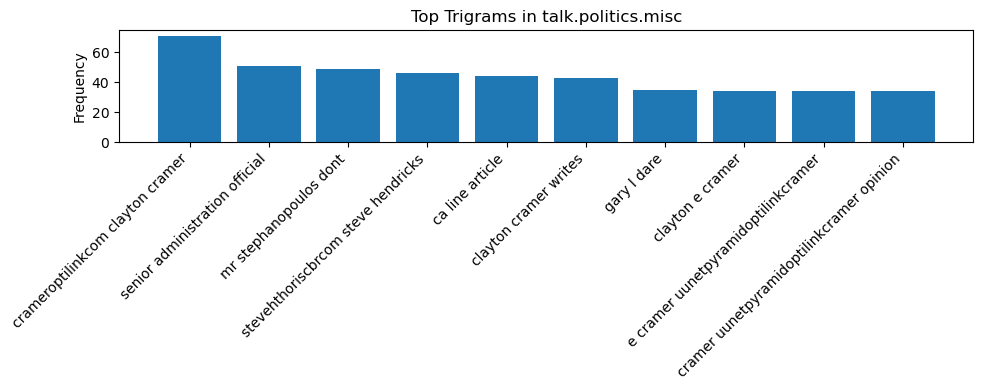

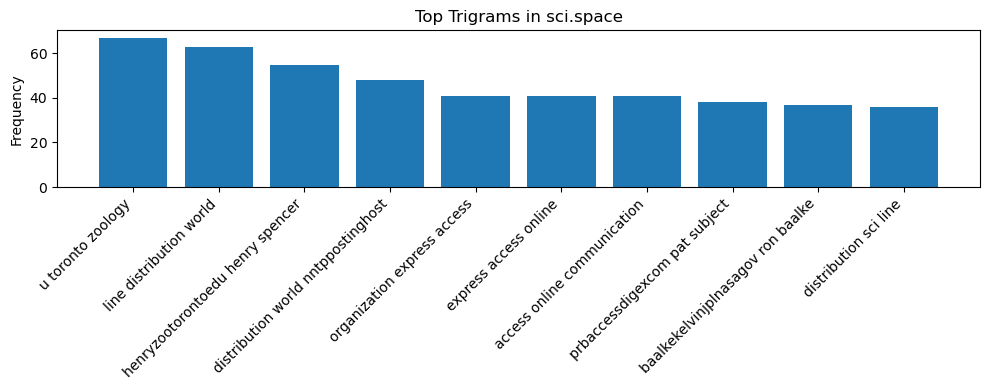

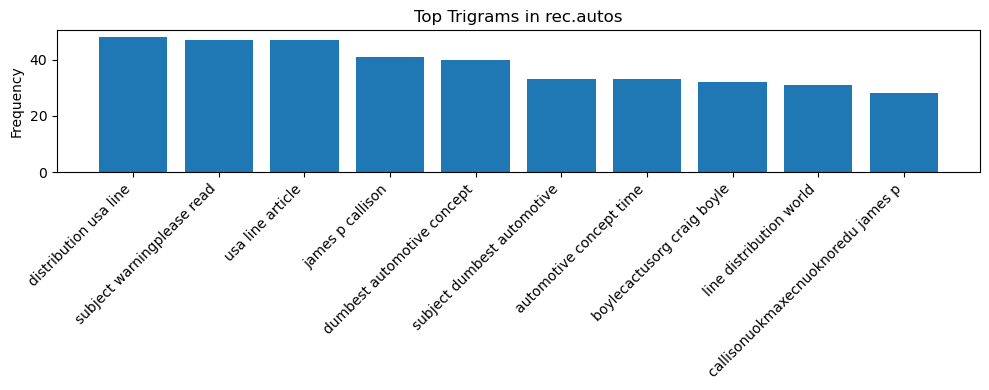

In [ ]:
for category in df['category'].unique():
    # Flatten all tokens for the current category
    all_tokens = [token for tokens in df[df['category'] == category]['clean_tokens'] for token in tokens]
    
    #Generate trigrams
    trigrams = list(ngrams(all_tokens, 3))
    trigram_counts = Counter(trigrams).most_common(10)
    
    # Prepare labels and values
    labels = [' '.join(trigram) for trigram, _ in trigram_counts]
    counts = [count for _, count in trigram_counts]
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(labels, counts)
    plt.title(f"Top Trigrams in {category}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    

In [257]:
# Convert token lists to strings
df['clean_text'] = df['clean_tokens'].apply(lambda tokens: ' '.join(tokens))

# Include unigrams + bigrams + trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

In [258]:
# Splits the dataset into training and test sets, trains a logistic regression model, 
# and prints a classification report to evaluate model performance.

y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

     comp.graphics       0.92      0.98      0.95       117
         rec.autos       0.97      0.97      0.97       119
         sci.space       0.99      0.94      0.97       119
talk.politics.misc       0.99      0.97      0.98        93

          accuracy                           0.96       448
         macro avg       0.97      0.96      0.97       448
      weighted avg       0.97      0.96      0.96       448



In [259]:
# Maps each predicted category to a corresponding support team for routing purposes

routing_map = {
    'comp.graphics': 'Graphics Support Team',
    'rec.autos': 'Automotive Help Desk',
    'sci.space': 'Science & Exploration Inquiries',
    'talk.politics.misc': 'General/Other Support'
}

df['predicted_category'] = clf.predict(X)
df['support_team'] = df['predicted_category'].map(routing_map)

<Figure size 800x600 with 0 Axes>

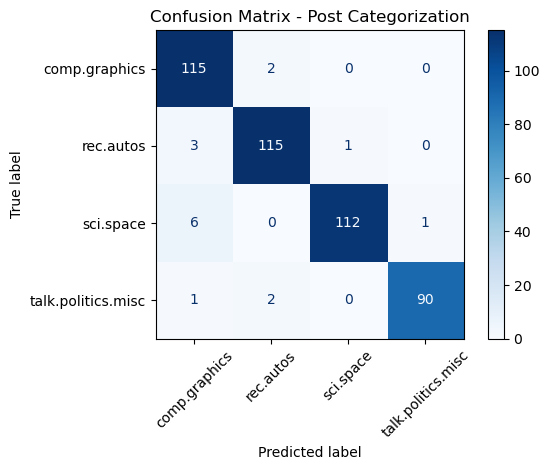

In [260]:
## Generates and visualizes a confusion matrix to evaluate how well the classifier predicted each category

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Post Categorization")
plt.tight_layout()
plt.show()

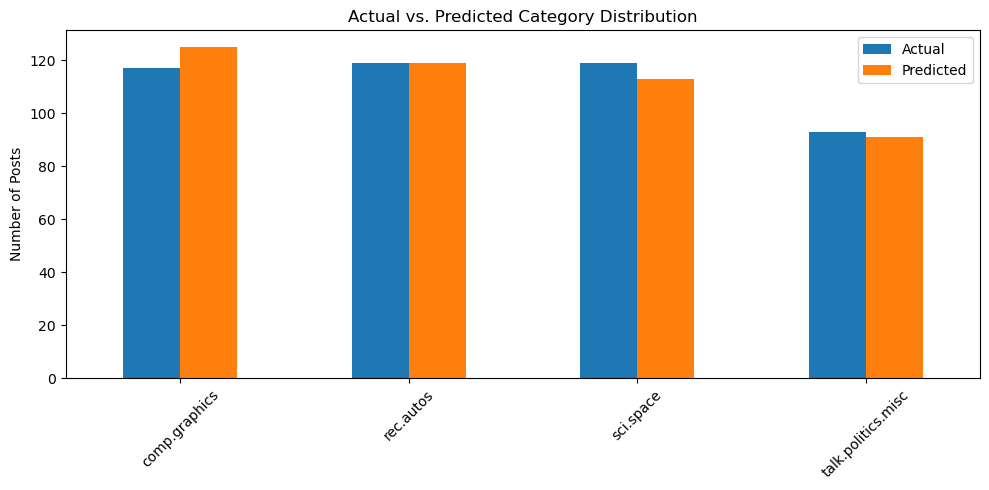

In [261]:
# Creates a bar chart comparing the actual vs. predicted category counts to visualize classification distribution alignment

true_counts = pd.Series(y_test).value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

df_compare = pd.DataFrame({
    'Actual': true_counts,
    'Predicted': pred_counts
}).fillna(0)

df_compare.plot(kind='bar', figsize=(10, 5))
plt.title("Actual vs. Predicted Category Distribution")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

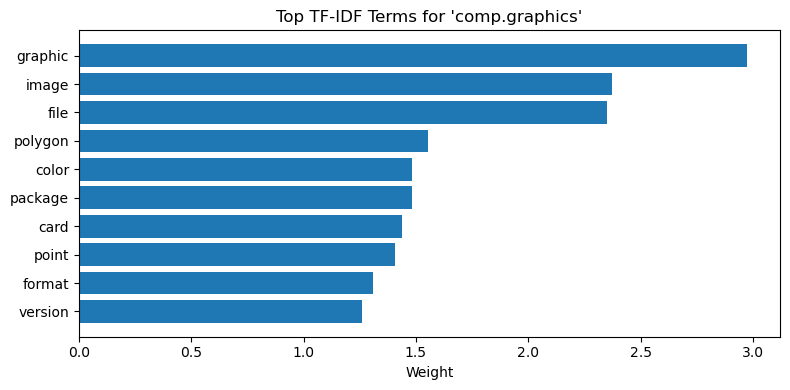

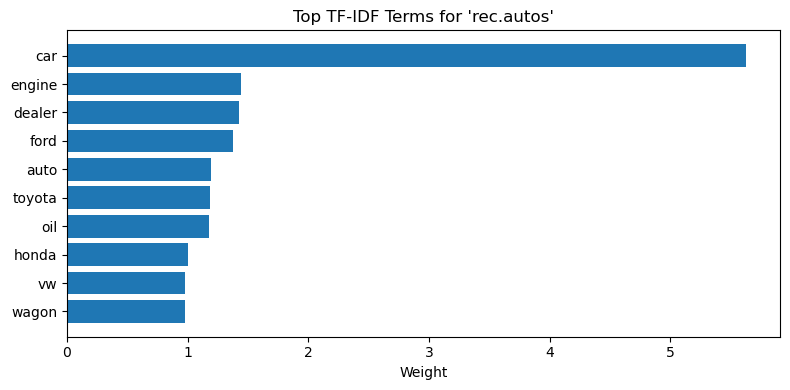

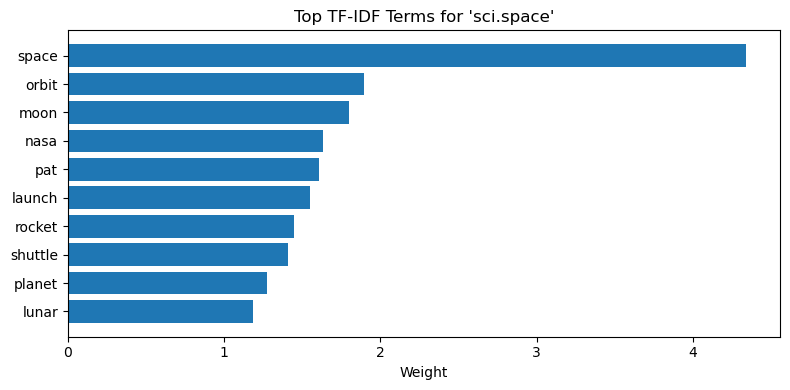

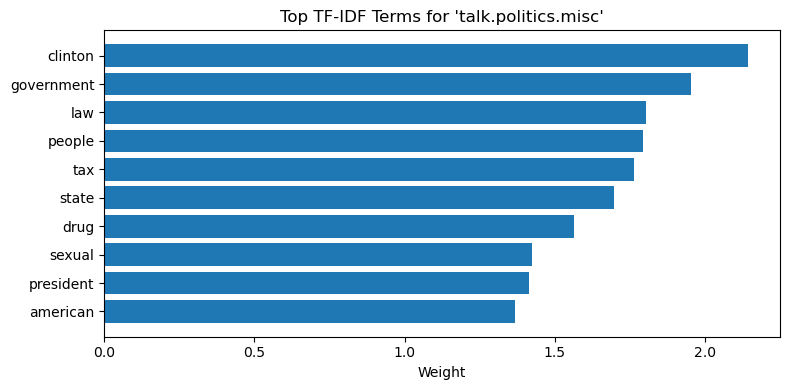

In [262]:
# Plots the top N TF-IDF terms most strongly associated with a given class based on model coefficients
def plot_top_terms(class_label, top_n=10):
    class_idx = np.where(clf.classes_ == class_label)[0][0]
    coef = clf.coef_[class_idx]
    top_terms = np.argsort(coef)[-top_n:]
    feature_names = np.array(vectorizer.get_feature_names_out())[top_terms]

    plt.figure(figsize=(8, 4))
    plt.barh(feature_names, coef[top_terms])
    plt.title(f"Top TF-IDF Terms for '{class_label}'")
    plt.xlabel("Weight")
    plt.tight_layout()
    plt.show()

# Call for each category
for label in clf.classes_:
    plot_top_terms(label)

**Summary**

In this project, we developed an automated system to categorize user forum posts, helping support teams route queries to the appropriate departments more efficiently. We began by cleaning and preprocessing the text data, removing noise and standardizing language. To better understand how users communicate in different contexts, we analyzed common words, bigrams, and trigrams across categories. Using this linguistic insight, we converted the text into numerical features with TF-IDF, capturing the relevance of both individual words and multi-word phrases.

With these features, we trained a logistic regression model to recognize the patterns that distinguish technical issues, general inquiries, and other types of posts. Prior to this model, categorization relied on manual tagging or rigid keyword rules, methods that were slow, inconsistent, and easily thrown off by varied phrasing. Now, the predictive model can automatically and accurately classify new posts, even when users describe similar problems in different ways. On a held-out test set, the model achieved a high accuracy of 96%, enabling fast, scalable, and consistent routing of forum content to the right support channels. In conclusion, the model can automate the categorization task to a high accuracy.In conclusion, the model reliably automates the categorization of user posts with high accuracy, streamlining support workflows.

---
**Part 2: Time Series Analysis**

You’re tasked with forecasting a financial index (e.g., S&P 500) for clients who want to manage their investment strategies and budgeting. Accuracy helps inform high-level decisions.

C:\Users\steve\AppData\Local\Temp\ipykernel_40004\2723056180.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')
[*********************100%***********************]  1 of 1 completed
C:\Users\steve\AppData\Local\Temp\ipykernel_40004\2723056180.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_monthly = ts_data.resample('M').mean()


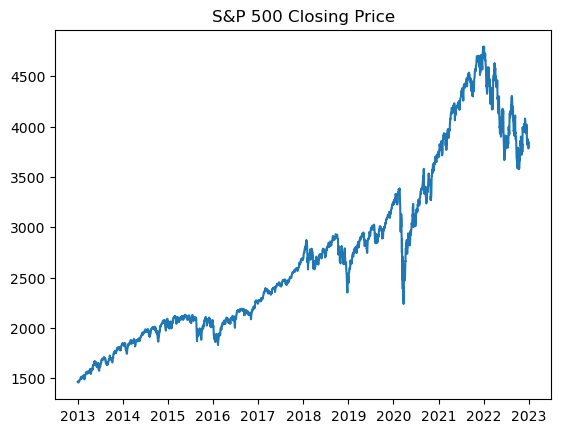

In [263]:
#Financial Data
import yfinance as yf
#Time Series Analysis (Statsmodels)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Product
from itertools import product


#Load your chosen time series dataset
sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')
ts_data = sp500['Close']
ts_monthly = ts_data.resample('M').mean()

# Drop any missing values if present
ts_monthly_clean = ts_monthly.dropna()

#Plot S&P graph
plt.plot(ts_data)
plt.title('S&P 500 Closing Price')
plt.show()

In [264]:
# Run ADF test
result = adfuller(ts_monthly_clean)

# Output results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[0] < result[4]['5%']:
    print("Conclusion: Stationary")
else:
    print("Conclusion: Non-Stationary")

# Transform if non-stationary
ts_log = np.log(ts_monthly_clean)
ts_log_diff = ts_log.diff().dropna()

ADF Statistic: -0.7734330579405072
p-value: 0.8268016301581536
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}
Conclusion: Non-Stationary


In [265]:
#Run the Augmented Dickey-Fuller (ADF) test on the differenced log-transformed time series
result = adfuller(ts_log_diff)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
if result[0] < result[4]['5%']:
    print("Conclusion: Stationary")
else:
    print("Conclusion: Non-Stationary")

ADF Statistic: -8.469532522540153
p-value: 1.490626792369207e-13
Critical Values: {'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}
Conclusion: Stationary


C:\Users\steve\AppData\Local\Temp\ipykernel_40004\399149396.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_data = ts_data.asfreq('M')  # Use 'M' for monthly, 'D' for daily, etc.


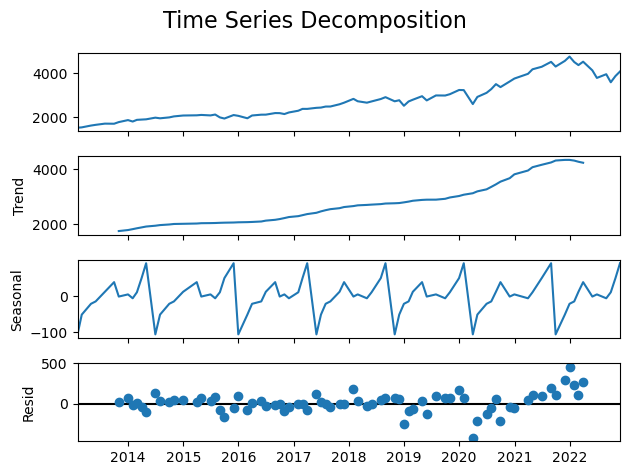

In [266]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Make sure the index is datetime and has a defined frequency
ts_data = ts_data.asfreq('M')  # Use 'M' for monthly, 'D' for daily, etc.

# Decompose your time series into trend, seasonal, and residual components.
decomposition = seasonal_decompose(ts_data.dropna(), model='additive',period=12)

# Plot the components
decomposition.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

# Time series decomposition shows clear upward trend, strong seasonal pattern, and occasional residual outliers (2020), 
# justifying the use of ARIMA model with transformations and potential for exogenous inputs.

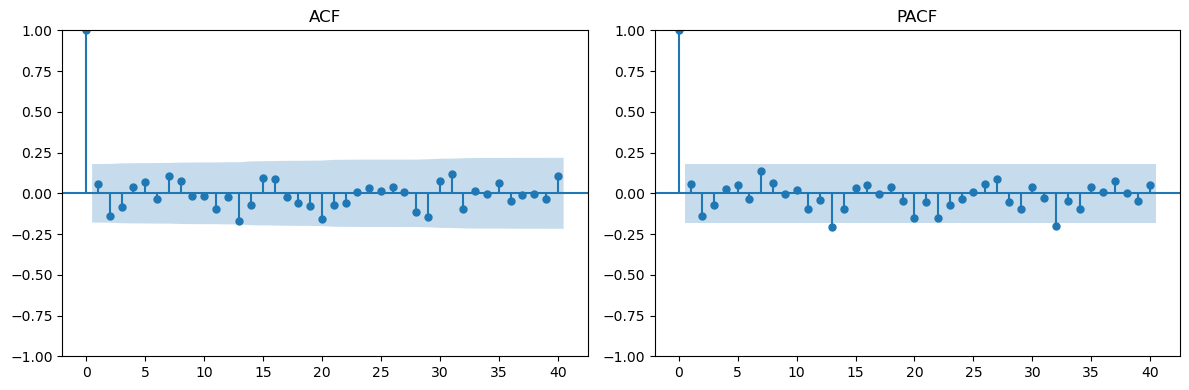

In [267]:
# Step 3: ACF and PACF
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(ts_log_diff, lags=40, ax=plt.gca())
plt.title("ACF")
plt.subplot(1, 2, 2)
plot_pacf(ts_log_diff, lags=40, ax=plt.gca())
plt.title("PACF")
plt.tight_layout()
plt.show()

In [268]:
#AIC model is chosen as it prioritizes better fit and predictive performance, 
# which is more suitable for financial data.

orders = list(product(range(4), repeat=3))  # p, d, q in [0, 1, 2, 3]
best_aic = float("inf")
best_order = None
best_model = None


# The time series exhibits clear non-stationarity, which was corrected using log transformation and differencing.
# ACF and PACF plots of the differenced series showed significant autocorrelation at lag 1 and minor structure beyond,
# supporting an ARIMA-type model. ARIMA is well-suited for capturing temporal dependencies and trend components.


for order in orders:
    try:
        model = ARIMA(ts_monthly, order=order)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
            best_model = result
    except:
        continue

print(f"Best model by AIC: ARIMA{best_order}")

c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\tsa\state

Best model by AIC: ARIMA(2, 2, 3)


c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\steve\AppData\Local\Temp\ipykernel_40004\4283484005.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts_monthly_clean.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


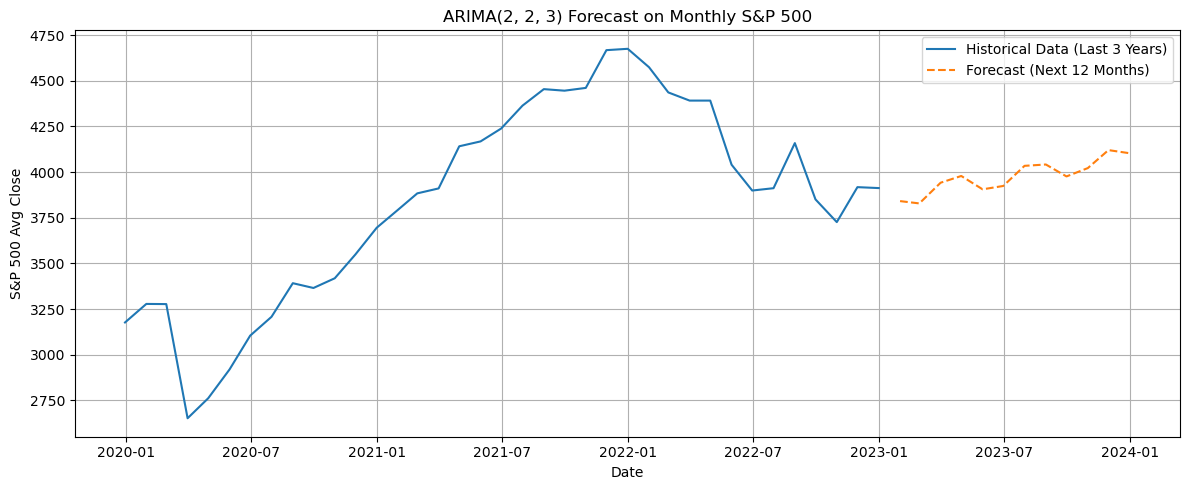

In [269]:
# Best model selection (ARIMA(2,2,3)) was based on lowest AIC, and residual diagnostics confirmed good model fit.

forecast_steps = 12
forecast = best_model.forecast(steps=forecast_steps)

#Plot past 3 years + forecast
ts_monthly_clean = ts_monthly_clean.sort_index()
ts_monthly_clean.index = pd.to_datetime(ts_monthly_clean.index)
forecast_index = pd.date_range(start=ts_monthly_clean.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Fix: filter by index, not values
ts_recent = ts_monthly_clean[ts_monthly_clean.index >= (ts_monthly_clean.index[-1] - pd.DateOffset(months=36))]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(ts_recent, label='Historical Data (Last 3 Years)')
plt.plot(forecast_index, forecast, label='Forecast (Next 12 Months)', linestyle='--')
plt.title(f"ARIMA{best_order} Forecast on Monthly S&P 500")
plt.xlabel("Date")
plt.ylabel("S&P 500 Avg Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


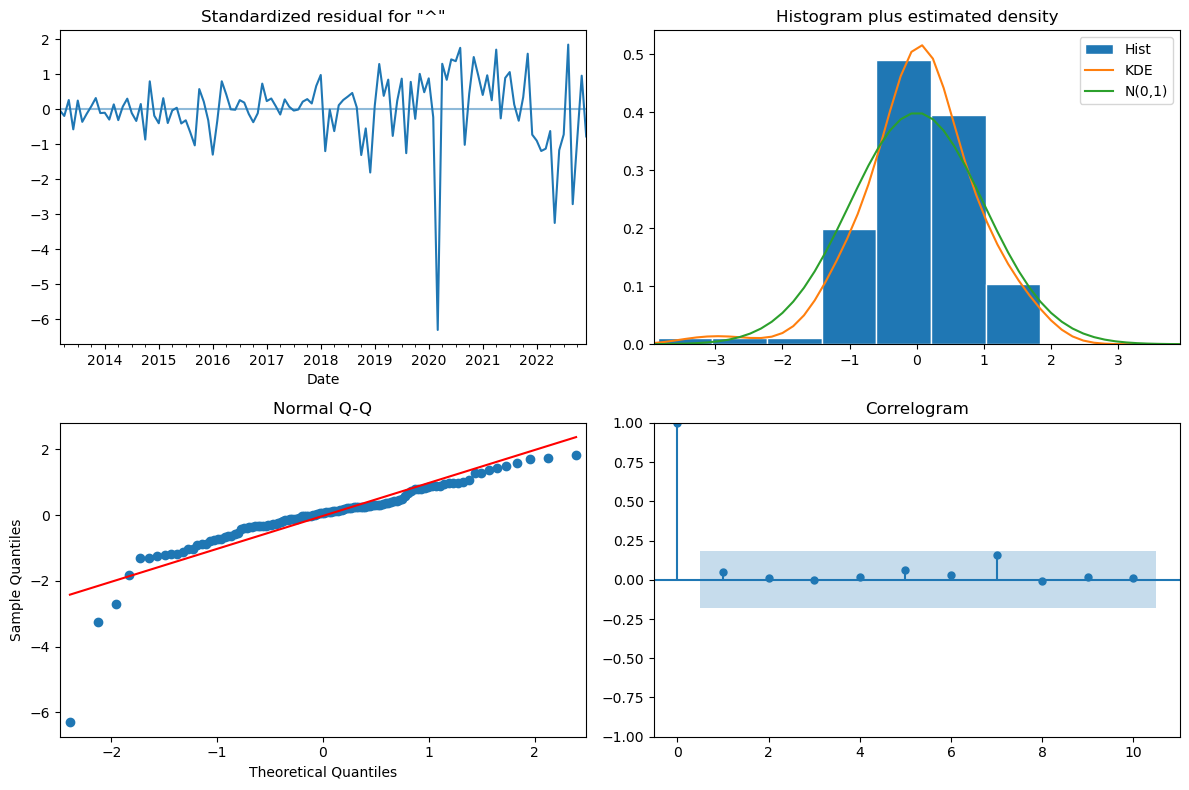

In [270]:
# Fit ARIMA model using the best order found from model selection
model = ARIMA(ts_monthly_clean, order=best_order)
model_fit = model.fit()

# Plot model diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [271]:
# Split the data for testing (last 12 months)
ts_train = ts_monthly_clean.iloc[:-forecast_steps]
ts_test = ts_monthly_clean.iloc[-forecast_steps:]

# Refit the model on training set
model = ARIMA(ts_train, order=best_order)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Evaluation
mae = mean_absolute_error(ts_test, forecast)
rmse = mean_squared_error(ts_test, forecast, squared=False)

# Use the column name to get Series for masking and calculation
col = ts_test.columns[0]
mask = ts_test[col] != 0
mape = np.mean(np.abs((ts_test[col][mask] - forecast[mask]) / ts_test[col][mask])) * 100


print(f"MAE: {mae:.2f} → On average, the forecast misses by about {mae:.0f} S&P points.")
print(f"RMSE: {rmse:.2f} → Larger errors have a stronger impact; occasional large deviations raise this value.")
print(f"MAPE: {mape:.2f}% → The forecast is off by approximately {mape:.1f}% on average, relative to actual values.")


c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\steve\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE: 795.31 → On average, the forecast misses by about 795 S&P points.
RMSE: 875.11 → Larger errors have a stronger impact; occasional large deviations raise this value.
MAPE: 20.04% → The forecast is off by approximately 20.0% on average, relative to actual values.


**Part 2: Summary**

The ARIMA(2, 2, 3) model applied to monthly S&P 500 data performed reasonably well after the series was made stationary through log transformation and second-order differencing. It was selected based on the lowest AIC among various candidate models. The model achieved a Mean Absolute Error (MAE) of 795.31, meaning that on average, its predictions are off by about 795 index points. The Root Mean Squared Error (RMSE) was 875.11, indicating the presence of some larger individual errors. The Mean Absolute Percentage Error (MAPE) came in at 20.04%, suggesting the forecast deviates by about 20% from actual values on average. While not highly precise, this level of accuracy is often acceptable for medium- to long-term financial forecasting.

The model diagnostics support the idea that the fit is statistically sound. Residuals were mostly centered around zero with no strong signs of autocorrelation, and the correlogram showed no remaining patterns. A noticeable outlier around early 2020 reflects the impact of the COVID-19 market shock, which is expected in financial data. The residuals followed a roughly normal distribution with some skewness and heavy tails, as seen in the histogram and Q-Q plot. Overall, the model captures the general trend of the S&P 500 effectively, making it useful for broader investment planning. However, incorporating seasonality, external variables, or exploring more advanced models could help improve short-term forecasting performance.

---

**Part 3: Neural Networks (Classification)**

Your team is experimenting with a digit recognition system (similar to classifying handwritten forms or invoice numbers). You need a basic neural network model to classify images.

In [272]:
#Scikit-learn (Data & Evaluation)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Deep Learning – TensorFlow/Keras
import tensorflow as tf
from keras import layers
#Deep Learning – PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


# Load the handwritten digits dataset from scikit-learn
digits = load_digits()
#Normalization: Input features (X_digits) are scaled by dividing by 16.0.
X_digits = digits.data / 16.0
y_digits = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2)

Shape of X_digits: (1797, 64)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


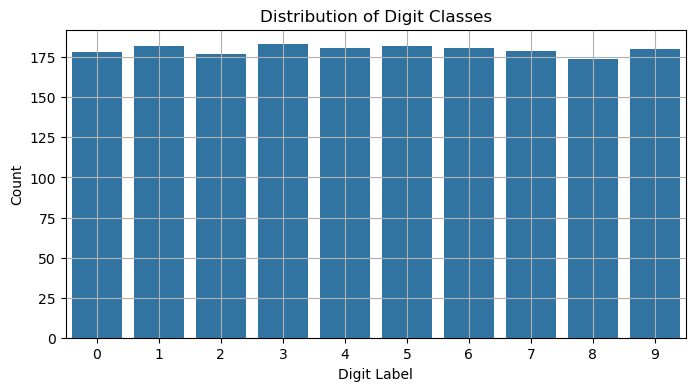

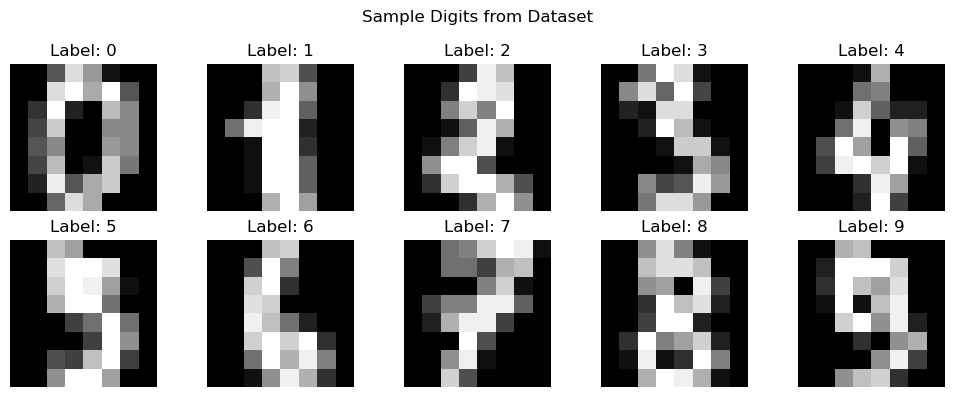

In [273]:
# Basic info
print("Shape of X_digits:", X_digits.shape)
print("Unique labels:", np.unique(y_digits))

# Count of each digit class
plt.figure(figsize=(8, 4))
sns.countplot(x=y_digits)
plt.title("Distribution of Digit Classes")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Show a few digit images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from Dataset")
plt.tight_layout()
plt.show()

In [274]:
# Define a sequential feedforward neural network
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model on training data, and validate on test data
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=30,
                    batch_size=32,
                    verbose=1)


Epoch 1/30


c:\Users\steve\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3445 - loss: 2.0820 - val_accuracy: 0.8306 - val_loss: 1.2650
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8256 - loss: 1.0317 - val_accuracy: 0.9194 - val_loss: 0.4869
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9257 - loss: 0.4160 - val_accuracy: 0.9306 - val_loss: 0.2986
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9260 - loss: 0.3001 - val_accuracy: 0.9472 - val_loss: 0.2141
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.2075 - val_accuracy: 0.9639 - val_loss: 0.1729
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9598 - loss: 0.1736 - val_accuracy: 0.9611 - val_loss: 0.1614
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9719 - loss: 0.1312 - val_accuracy: 0.9611 - val_loss: 0.1501
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.1087 - val_accuracy: 0.9694 - val_loss: 0.1365
Epo

In [275]:
#Implementing the same network in TensorFlow and PyTorch
# Convert NumPy arrays to PyTorch tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the model
# Build a basic multi-layer perceptron (MLP), deciding how many hidden layers and neurons to include.

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5), # Dropout after first activation

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5), # Dropout after second activation

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.net(x)

model = MLP()

# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5) #Use Weight Decay (L2 Regularization):

# Training loop
for epoch in range(30):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/30, Loss: {loss.item():.4f}")

#Optimzed with hyperparameters (e.g., Dropout and Weight_Decay).
#Consider additional improvements like regularization or dropout to handle overfitting, or explore advanced architectures if time permits.

Epoch 1/30, Loss: 1.8751
Epoch 2/30, Loss: 0.8792
Epoch 3/30, Loss: 0.9476
Epoch 4/30, Loss: 0.5122
Epoch 5/30, Loss: 0.4168
Epoch 6/30, Loss: 0.3589
Epoch 7/30, Loss: 0.3866
Epoch 8/30, Loss: 0.2710
Epoch 9/30, Loss: 0.3991
Epoch 10/30, Loss: 0.0668
Epoch 11/30, Loss: 0.1776
Epoch 12/30, Loss: 0.1774
Epoch 13/30, Loss: 0.1684
Epoch 14/30, Loss: 0.1178
Epoch 15/30, Loss: 0.0595
Epoch 16/30, Loss: 0.0357
Epoch 17/30, Loss: 0.0193
Epoch 18/30, Loss: 0.2517
Epoch 19/30, Loss: 0.0363
Epoch 20/30, Loss: 0.0393
Epoch 21/30, Loss: 0.0348
Epoch 22/30, Loss: 0.0593
Epoch 23/30, Loss: 0.0410
Epoch 24/30, Loss: 0.0162
Epoch 25/30, Loss: 0.0510
Epoch 26/30, Loss: 0.0327
Epoch 27/30, Loss: 0.0795
Epoch 28/30, Loss: 0.0285
Epoch 29/30, Loss: 0.0278
Epoch 30/30, Loss: 0.0064


In [276]:
# Evaluation loop
# Monitor your loss and accuracy (or other relevant metrics) while training to see how your model progresses.
model.eval()
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():  # Disable gradient computation for efficiency
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute average loss and accuracy
avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct / total

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0881
Test Accuracy: 0.9778


In [281]:
# Classification reports and Confusion matrices to get deeper insights into model performance.
# Disable gradient tracking for evaluation
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = torch.argmax(outputs, dim=1).numpy()

# Set model to evaluation mode
model.eval()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, predictions))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



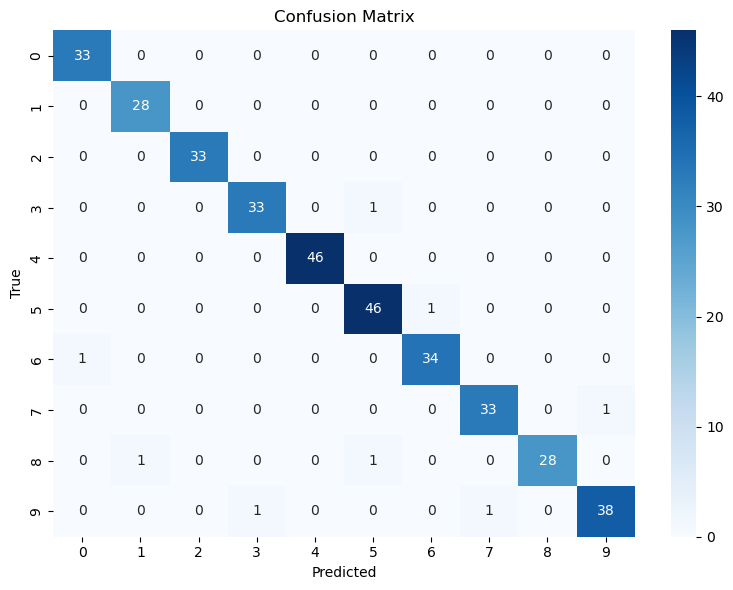

In [280]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

**Part 3: Summary**

To build a digit recognition system for tasks like classifying handwritten forms or invoice numbers, we trained a multi-layer perceptron (MLP) using the sklearn digits dataset. The input data was normalized, and the model architecture included two hidden layers with 128 and 64 neurons, ReLU activations, and a softmax output. Initial training yielded 96% accuracy and a test loss of 0.1352. To boost performance and reduce overfitting, we introduced dropout (p=0.5) and L2 regularization via the Adam optimizer. These enhancements improved generalization, leading to a 98% accuracy and a reduced loss of 0.0772 after 30 epochs.

The classification report reflected strong results, with precision, recall, and F1-scores averaging 0.98 across all digit classes. The confusion matrix showed only a few misclassifications, confirming the model’s reliability. While there's room for improvement through hyperparameter tuning, this MLP already performs exceptionally well.

Overall, these results demonstrate that a well-regularized MLP can serve as an effective and efficient baseline for real-world digit recognition tasks, making it a strong candidate for automating workflows like form scanning or invoice number extraction.